<a href="https://colab.research.google.com/github/aaolcay/Convolutional-Neural-Network-Examples/blob/main/mnist_dataset_Sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CNN for `mnist` Dataset**
In this notebook, we applied one simple CNN architecture by using Sequential model. 

In [70]:
import tensorflow.keras as keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

### **Load Dataset**
Data chosen in this implementation is quite famous, and most of the tutorials on CNNs include this dataset as it is very easy to load and to use with CNN model considering model's high accuracy score.

In [71]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

#### **Data Shapes**
We need to know the data shape and which type of data we deal with. This should also be noticed that 2 dimensional convolutional layer (`Conv2D`) needs a shape of (**#samples**, **height**, **width**, **#channels**). For example, imagine that we have 200 training data consist of images whose heights (i.e., #rows) are 28 and widths are 28 (i.e., #columns) as well. For colorful image the number of channels is 3 (RGB: Red, Green, Blue) but gray images have only one channel that is what we consider in this implementation for making prediction.  

In [72]:
print(f'The shape of training data is : {x_train.shape}.\nThe shape of test data is {x_test.shape}')

The shape of training data is : (60000, 28, 28).
The shape of test data is (10000, 28, 28)


The data shapes are not appropriate to be used within the 2D convolutional layers. Therefore, we need to add channel number to the datasets.

                                  (60000, 28, 28) -> (60000, 28, 28, 1)

                                  (10000, 28, 28) -> (10000, 28, 28, 1)


In [73]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]
print(f'The shape of training data is : {x_train.shape}.\nThe shape of test data is {x_test.shape}')

The shape of training data is : (60000, 28, 28, 1).
The shape of test data is (10000, 28, 28, 1)


Let's now look at the labels and convert them to categorical form. Watch out CNN is a deep learning model and needs labeled data that makes it a supervised method. 

In [74]:
print(f'Labels of train dataset: {y_train[:20]}\nLabels of test dataset: {y_test[:20]}')
print(f'The shape of training data is : {y_train.shape}.\nThe shape of test data is {y_test.shape}')
ytrain = y_train.copy()
ytest = y_test.copy()

Labels of train dataset: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
Labels of test dataset: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
The shape of training data is : (60000,).
The shape of test data is (10000,)


Visualize each label with the data (images of numbers).

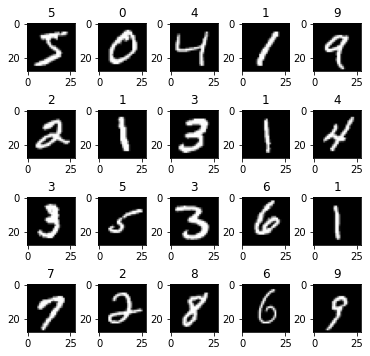

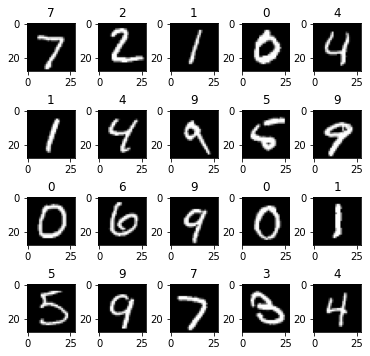

In [75]:
fig = plt.figure(figsize=(5,5))
for i in range(20):
  x_test[i,:,:,:]
  fig.add_subplot(4,5,i+1)
  plt.imshow(x_train[i,:,:,:], cmap='gray')
  plt.title(f'{y_train[i]}')
  fig.tight_layout(pad=0.2)

fig = plt.figure(figsize=(5,5))
for k in range(20):
  fig.add_subplot(4,5,k+1)
  plt.imshow(x_test[k,:,:,:], cmap='gray')
  plt.title(f'{y_test[k]}')
  fig.tight_layout(pad=0.2)

Now, let's convert each label into categorical from:

0 -> [1 0 0 0 0 0 0 0 0 0]

1 -> [0 1 0 0 0 0 0 0 0 0]

2 -> [0 0 1 0 0 0 0 0 0 0]

3 -> [0 0 0 1 0 0 0 0 0 0]

4 -> [0 0 0 0 1 0 0 0 0 0]

5 -> [0 0 0 0 0 1 0 0 0 0]

6 -> [0 0 0 0 0 0 1 0 0 0]

7 -> [0 0 0 0 0 0 0 1 0 0]

8 -> [0 0 0 0 0 0 0 0 1 0]

9 -> [0 0 0 0 0 0 0 0 0 1]

In [76]:
num_class = 10
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [77]:
for i in range(20):
  print(f'Labels of train dataset:\n{ytrain[i]}->{y_train[i]}\nLabels of test dataset:\n{ytest[i]}->{y_test[i]}')

print(f'The shape of training data is : {y_train.shape}.\nThe shape of test data is {y_test.shape}')

Labels of train dataset:
5->[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Labels of test dataset:
7->[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Labels of train dataset:
0->[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of test dataset:
2->[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Labels of train dataset:
4->[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Labels of test dataset:
1->[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of train dataset:
1->[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of test dataset:
0->[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of train dataset:
9->[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Labels of test dataset:
4->[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Labels of train dataset:
2->[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Labels of test dataset:
1->[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of train dataset:
1->[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of test dataset:
4->[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Labels of train dataset:
3->[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Labels of test dataset:
9->[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Labels of train dataset:
1->[0. 1. 0. 0. 0. 0. 0

### **Build CNN architecture**

In [78]:
model = keras.Sequential()

#######################################################
#-------------- 1st convolutional layer --------------#
#------------------ with 64 filters ------------------#
#######################################################
model.add(keras.layers.Conv2D(64, 
                              kernel_size=(3,3), # filter/grid size
                              activation='relu', # Rectified Linear Unit used as an activation function
                              input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]), # As it is the first layer, needs to enter input shape 
                              padding='same' # zero padding to apply filters into whole image pixels 
                              )
          )
model.add(keras.layers.MaxPool2D((3,3), # grid size
                                     strides=(2,2), # strides
                                     padding='same'# applies max pooling to whole input
                                     ))
model.add(keras.layers.BatchNormalization()) # standardizes/normalizes the contributions
                                                 # to a layer for every mini-batch

#######################################################
#-------------- 2nd convolutional layer --------------#
#------------------ with 32 filters ------------------#
#######################################################
model.add(keras.layers.Conv2D(32,
                              kernel_size=(3,3),
                              activation='relu',
                              padding='same'
                              )
          )
model.add(keras.layers.MaxPool2D((3,3),
                                     strides=(2,2),
                                     padding='same'
                                     ))
model.add(keras.layers.BatchNormalization())

#######################################################
#---------------------- Flatten ----------------------#
#######################################################
model.add(keras.layers.Flatten())

#######################################################
#------------------ Fully Connected ------------------#
#######################################################
model.add(keras.layers.Dense(32, activation='relu')) # number of parameters in output:
                                                     # (1568:weights + 1:bias)*32:number of units
                                                     # = 50208 
# to avoid overfitting we add dropout
model.add(keras.layers.Dropout(0.3))

#######################################################
#-------------------- Output Layer -------------------#
#######################################################
model.add(keras.layers.Dense(10, activation='softmax'))

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                      

In [80]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [81]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), shuffle=True, verbose =1)

Epoch 1/20
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0693 - accuracy: 0.8986 - val_loss: 0.0102 - val_accuracy: 0.9855
Epoch 2/20
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0223 - accuracy: 0.9720 - val_loss: 0.0078 - val_accuracy: 0.9896
Epoch 3/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0164 - accuracy: 0.9788 - val_loss: 0.0073 - val_accuracy: 0.9890
Epoch 4/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0138 - accuracy: 0.9827 - val_loss: 0.0071 - val_accuracy: 0.9895
Epoch 5/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0121 - accuracy: 0.9845 - val_loss: 0.0064 - val_accuracy: 0.9905
Epoch 6/20
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0115 - accuracy: 0.9850 - val_loss: 0.0080 - val_accuracy: 0.9898
Epoch 7/20
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0104 - accuracy: 0.9869 - val_loss: 0.0051 -

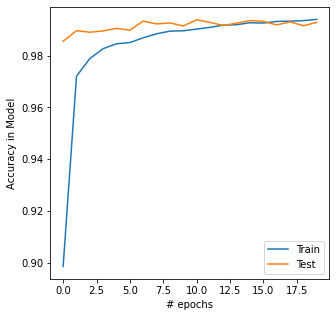

In [85]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('# epochs')
plt.ylabel('Accuracy in Model')
plt.legend()

Text(0, 0.5, 'Loss in Model')

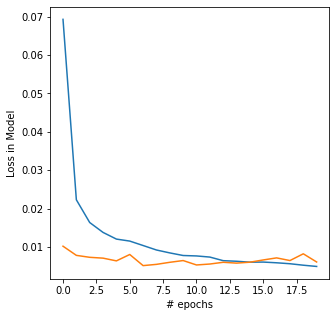

In [86]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('# epochs')
plt.ylabel('Loss in Model')

In [96]:
# Prediction
predictions = model.predict(x_test[:10])

1/1 [==============================] - 0s 23ms/step


In [97]:
predictions

array([[0.00000000e+00, 0.00000000e+00, 3.34200276e-36, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.99999940e-01,
        0.00000000e+00, 1.11053654e-37],
       [4.37298088e-22, 3.37619195e-20, 9.99999940e-01, 1.89883519e-27,
        6.43535902e-32, 7.31100533e-28, 1.77164181e-23, 1.82274106e-23,
        7.22285144e-21, 3.78643289e-38],
       [2.75312220e-33, 9.99999940e-01, 4.79544147e-21, 6.40837936e-27,
        1.52076201e-24, 8.70851656e-25, 8.72346290e-21, 3.08348404e-23,
        2.23567914e-25, 4.19238567e-29],
       [9.99999940e-01, 1.21985417e-28, 1.28849265e-19, 2.83560781e-28,
        5.62754752e-20, 9.35022395e-24, 4.23555437e-14, 3.67920566e-21,
        2.46672393e-19, 9.81182720e-22],
       [6.63591320e-33, 1.25364375e-24, 1.62336492e-22, 9.85451984e-36,
        9.99999940e-01, 6.41962628e-37, 6.84530538e-26, 9.76407792e-21,
        1.37560570e-21, 1.98968569e-15],
       [6.31053782e-36, 9.99999940e-01, 7.07056156e-23, 6.27622060e-32,
   

In [98]:
predictions = np.argmax(predictions,axis=1)

In [99]:
predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

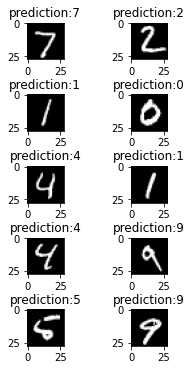

In [103]:
fig = plt.figure(figsize=(5,5))
for k in range(len(predictions)):
  fig.add_subplot(5,2,k+1)
  plt.imshow(x_test[k], cmap='gray')
  plt.title(f'prediction:{predictions[k]}')
  fig.tight_layout(pad=0.2)